In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexed_data = dataset.set_index(['Month'])
indexed_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


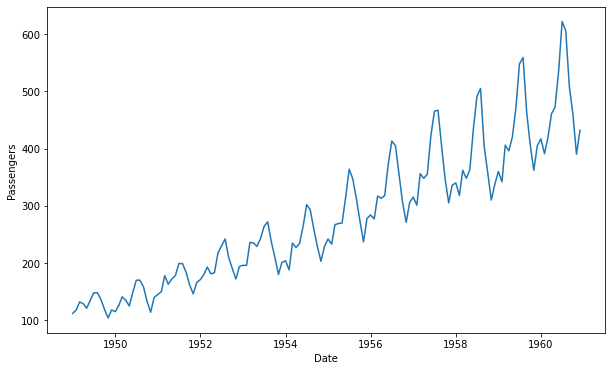

In [3]:
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(indexed_data)

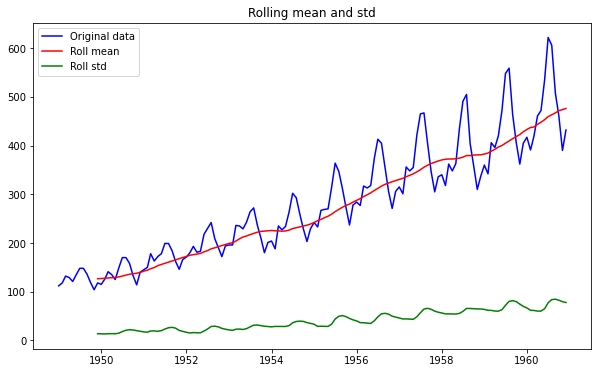

In [4]:
rollmean = indexed_data.rolling(window=12).mean()
rollstd = indexed_data.rolling(window=12).std()
origin = plt.plot(indexed_data, color = 'blue', label='Original data')
mean = plt.plot(rollmean, color = 'red',label ='Roll mean')
std = plt.plot(rollstd, color = 'green',label ='Roll std')
plt.legend(loc = 'best')
plt.title('Rolling mean and std')
plt.show(block = False)

In [5]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(indexed_data['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['test stastics','Pvalue','lags used','number of observations used'])
for key , value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

test stastics                    0.815369
Pvalue                           0.991880
lags used                       13.000000
number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


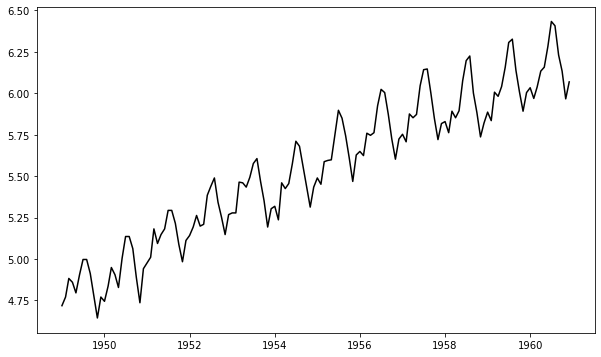

In [6]:
indexed_data_log = np.log(indexed_data)
plt.plot(indexed_data_log, color = 'black')

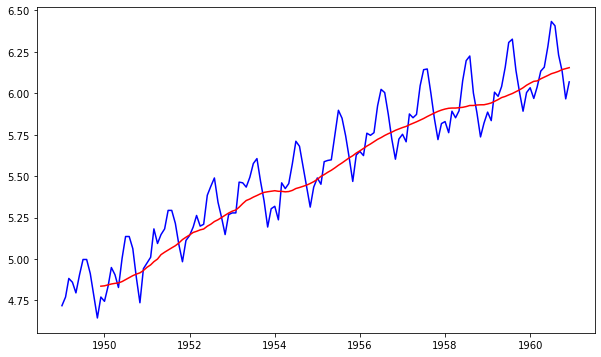

In [7]:
moving_average = indexed_data_log.rolling(window=12).mean()
moving_std = indexed_data_log.rolling(window=12).std()
morigin = plt.plot(indexed_data_log, color = 'blue', label='Original data')
mmean = plt.plot(moving_average, color = 'red',label ='Roll mean')


In [8]:
moving_indexed_data_log = indexed_data_log-moving_average
moving_indexed_data_log.dropna(inplace = True)
moving_indexed_data_log.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity_data(data):
    moving_mean = data.rolling(window =12).mean()
    moving_std = data.rolling(window =12).std()
    dorigin = plt.plot(data, color = 'blue', label = 'Original data')
    dmean = plt.plot(moving_mean, color = 'red', label = 'Mean')
    dstd = plt.plot(moving_std, color = 'green', label = 'Std')
    plt.legend(loc = 'best')
    plt.title('Moving avg and std')
    
    adftest = adfuller(data['#Passengers'], autolag = 'AIC' )
    doutput = pd.Series(adftest[0:4], index = ['test stastics','Pvalue','lags used','number of observations used'])
    for key, value in adftest[4].items():
        doutput['Critical value (%s)'%key] = value
    
    print(doutput)

test stastics                   -3.162908
Pvalue                           0.022235
lags used                       13.000000
number of observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


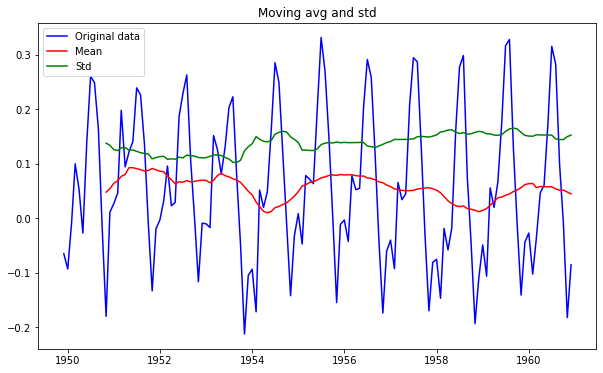

In [21]:
test_stationarity_data(moving_indexed_data_log)

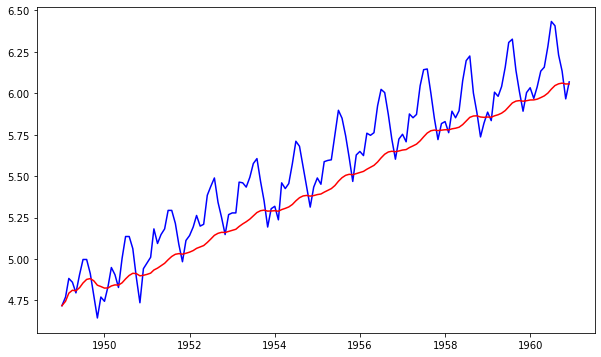

In [25]:
exponential_weight_average = indexed_data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexed_data_log, color = 'blue')
plt.plot(exponential_weight_average, color = 'red')

test stastics                   -3.601262
Pvalue                           0.005737
lags used                       13.000000
number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


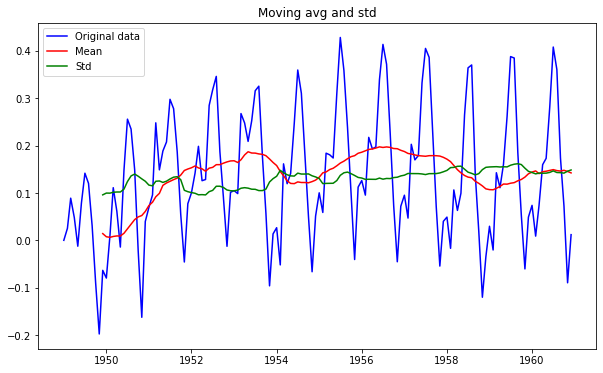

In [26]:
log_data_minus_exponential_data = indexed_data_log-exponential_weight_average
test_stationarity_data(log_data_minus_exponential_data)

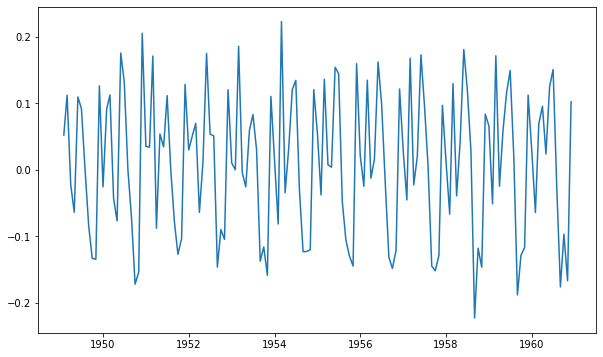

In [27]:
shifted_log_data = indexed_data_log - indexed_data_log.shift()
plt.plot(shifted_log_data)

test stastics                   -2.717131
Pvalue                           0.071121
lags used                       14.000000
number of observations used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


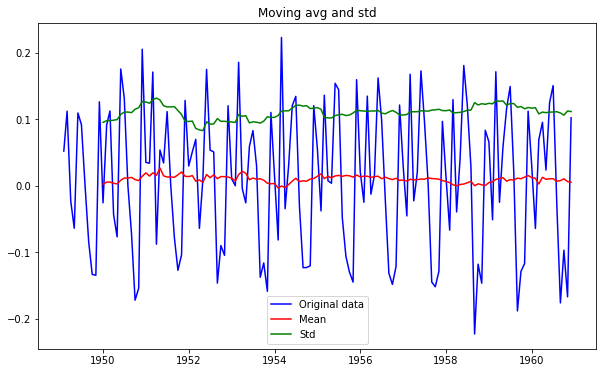

In [28]:
shifted_log_data.dropna(inplace = True)
test_stationarity_data(shifted_log_data)

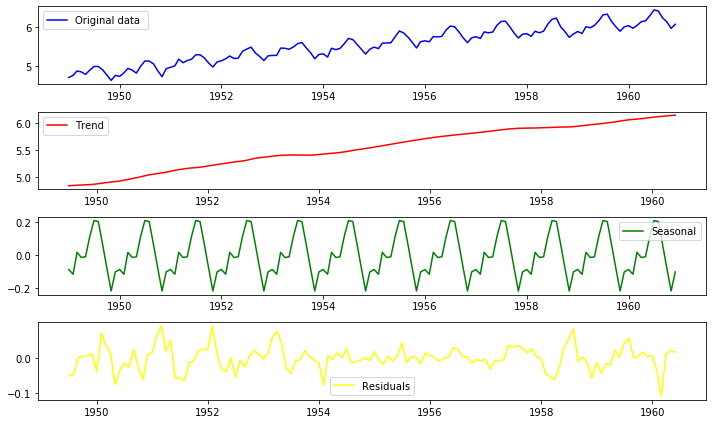

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_data_log)

trend = decomposition.trend
season = decomposition.seasonal
residuals = decomposition.resid

plt.subplot(411)
plt.plot(indexed_data_log, color = 'blue', label = 'Original data ')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, color = 'red', label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(season, color = 'green', label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residuals, color = 'yellow', label = 'Residuals')
plt.legend(loc = 'best')

plt.tight_layout()


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


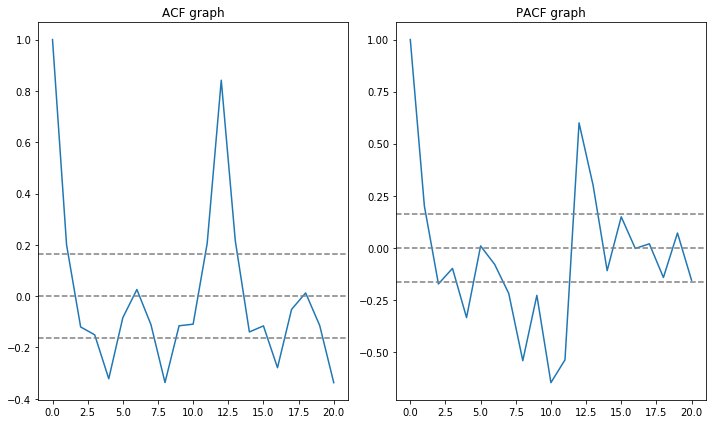

In [58]:
from statsmodels.tsa.stattools import acf, pacf
lagacf = acf(shifted_log_data,nlags = 20)
lagpacf = pacf(shifted_log_data, nlags =20, method = 'ols')

plt.subplot(121)
plt.plot(lagacf)
plt.axhline(y =0 , linestyle = '--', color = 'gray')
plt.axhline(y =-1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'gray')
plt.axhline(y =1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'gray')
plt.title('ACF graph')

plt.subplot(122)
plt.plot(lagpacf)
plt.axhline(y =0 , linestyle = '--', color = 'gray')
plt.axhline(y =-1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'gray')
plt.axhline(y =1.96/np.sqrt(len(shifted_log_data)), linestyle = '--', color = 'gray')
plt.title('PACF graph')

plt.tight_layout()

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS 1.0292')

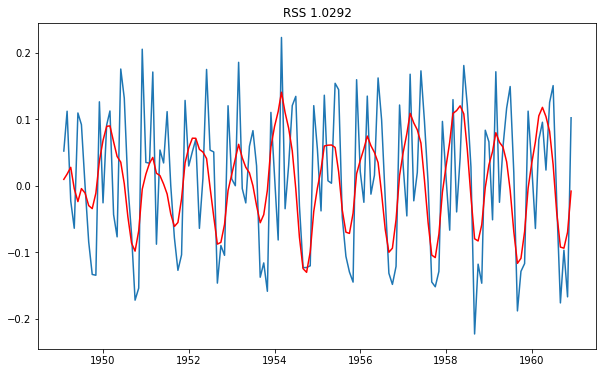

In [71]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexed_data_log, order = (2,1,2))
result_AR = model.fit(disp =-1)
plt.plot(shifted_log_data)
plt.plot(result_AR.fittedvalues, color = 'red')
plt.title('RSS %.4f'% sum((result_AR.fittedvalues-shifted_log_data['#Passengers'])**2))

In [72]:
prediction_arima_diff = pd.Series(result_AR.fittedvalues, copy =True)
print(prediction_arima_diff.head(10))

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
dtype: float64


In [73]:
prediction_arima_diff_cumsum = prediction_arima_diff.cumsum()
print(prediction_arima_diff_cumsum.head(10))

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
dtype: float64


In [80]:
prediction_ARIMA_log = pd.Series(indexed_data_log['#Passengers'][0], index = indexed_data_log.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_arima_diff_cumsum, fill_value =0)
prediction_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

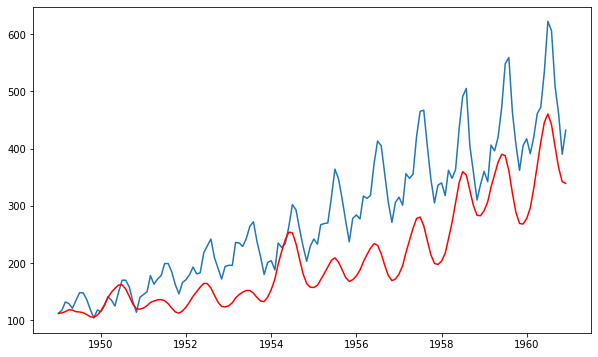

In [81]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexed_data)
plt.plot(prediction_ARIMA, color = 'red')

In [84]:
print(indexed_data.head(5))
print(prediction_ARIMA.head(5))
print(indexed_data_log.head(5))

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301987
1949-05-01    117.768364
dtype: float64
            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791


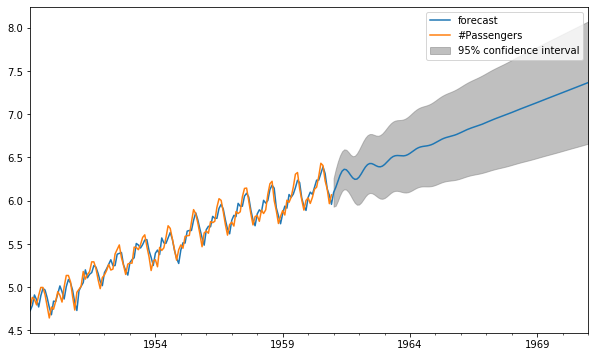

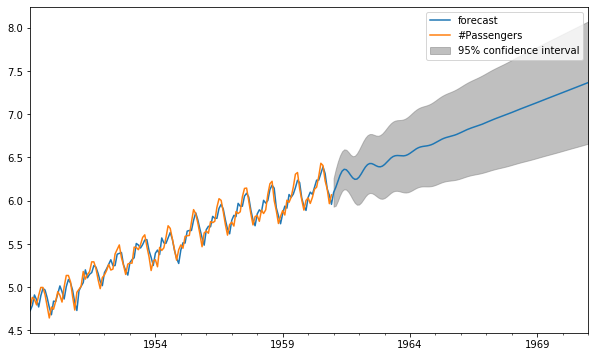

In [87]:
result_AR.plot_predict(1,264)